In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [61]:
!unzip /content/drive/MyDrive/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [64]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(256, 256), class_mode='categorical',
                                                batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [67]:
model = Sequential()

In [68]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [69]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [70]:
model.add(Flatten())

In [71]:
model.add(Dense(300, activation = "relu"))

In [72]:
model.add(Dense(300, activation = "relu"))

In [73]:
model.add(Dense(5,activation="softmax"))

In [74]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [75]:
len(a_flowers)

135

In [79]:
model.fit(a_flowers, epochs= 1,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

135/135 [==============================] - 309s 2s/step - loss: 1.1949 - accuracy: 0.5284 - val_loss: 0.7901 - val_accuracy: 0.7464


In [77]:
model.save("flowers.h5")

In [80]:
#Testing the Model

In [81]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [83]:
model = load_model("/content/drive/MyDrive/flowers.h5")

In [102]:
img = image.load_img("/content/drive/MyDrive/flowers/daisy/11023214096_b5b39fab08.jpg",target_size=(256,256))

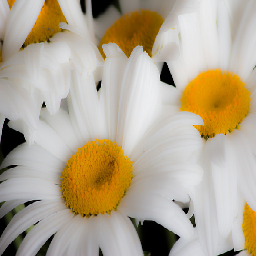

In [103]:
img

In [86]:
x = image.img_to_array(img)

In [87]:
x

array([[[ 54.,  44.,  55.],
        [ 96.,  62.,  61.],
        [108.,  59.,  89.],
        ...,
        [ 97., 117.,  54.],
        [ 68.,  84.,  39.],
        [ 68.,  86.,  38.]],

       [[ 38.,  72.,  22.],
        [151.,  84.,  78.],
        [212.,  50., 109.],
        ...,
        [114., 136.,  53.],
        [ 57.,  77.,  18.],
        [ 75.,  93.,  41.]],

       [[ 66.,  74.,  51.],
        [161.,  87., 114.],
        [149.,  88.,  83.],
        ...,
        [ 83., 104.,  25.],
        [ 71.,  89.,  41.],
        [ 70.,  85.,  54.]],

       ...,

       [[ 38.,  63.,  31.],
        [ 33.,  52.,  30.],
        [ 79.,  93.,  80.],
        ...,
        [ 33.,  58.,  37.],
        [209., 224., 219.],
        [207., 211., 220.]],

       [[ 44.,  62.,  38.],
        [ 34.,  54.,  27.],
        [ 43.,  54.,  37.],
        ...,
        [ 74.,  91.,  83.],
        [192., 204., 204.],
        [198., 201., 210.]],

       [[ 47.,  58.,  42.],
        [ 64.,  84.,  56.],
        [ 44.,  

In [88]:
x.ndim

3

In [89]:
x = np.expand_dims(x,axis= 0)

In [90]:
x.ndim

4

In [91]:
pred = model.predict(x)

In [92]:
pred

array([[0.0000000e+00, 1.1506154e-30, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [93]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [94]:
np.argmax(pred)

4

In [95]:
hi[np.argmax(pred)]

'tulip'